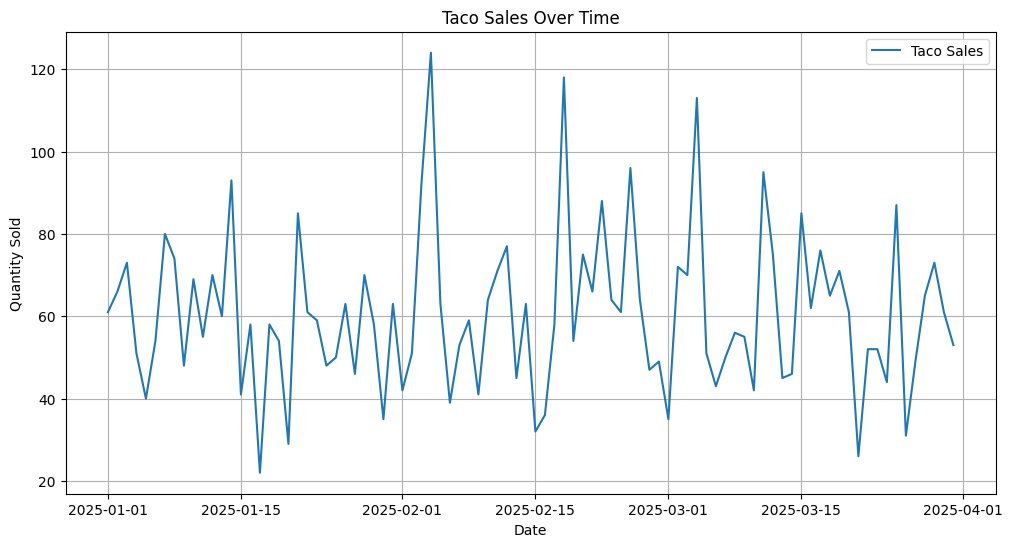

Forecasted Taco Sales:
        date  forecasted_sales
0 2025-04-01         53.080927
1 2025-04-02         58.058921
2 2025-04-03         60.470668
3 2025-04-04         60.666804
4 2025-04-05         58.248806


In [4]:
# time series analysis with ARIMA

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = "/content/taco_sales.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format and set it as index
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

# Remove rows with missing date values
df_cleaned = df.dropna(subset=['quantity_sold'])

# Ensure dataset is sorted by date
df_cleaned = df_cleaned.sort_index()

# Resample to daily frequency, filling missing values with 0
df_daily = df_cleaned.resample('D').sum()

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['quantity_sold'], label='Taco Sales')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Taco Sales Over Time')
plt.legend()
plt.grid()
plt.show()

# Fit an ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(df_daily['quantity_sold'], order=(5, 1, 0))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast the next 60 days (2 months)
forecast_steps = 60
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a forecast DataFrame
forecast_df = pd.DataFrame({'date': future_dates, 'forecasted_sales': forecast.values})

# Display forecasted sales using pandas head
# Display the first few rows for preview
print("Forecasted Taco Sales:")
print(forecast_df.head())
